## Import libs

In [1]:
from __future__ import print_function, division, absolute_import
import os
import GPy
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import pandas as pd
from scipy.ndimage import gaussian_filter1d
from scipy import signal
import sys
sys.path.insert(0,'../..')
print(sys.path)
from mtfunc.helper import *
import safeopt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import tqdm
# plt.style.use('science')


['../..', '/Users/adrianpaeckelripoll/rbc-parameter-tuning/fig_scripts/RBC330eval', '/opt/anaconda3/envs/env1/lib/python39.zip', '/opt/anaconda3/envs/env1/lib/python3.9', '/opt/anaconda3/envs/env1/lib/python3.9/lib-dynload', '', '/opt/anaconda3/envs/env1/lib/python3.9/site-packages', '/opt/anaconda3/envs/env1/lib/python3.9/site-packages/IPython/extensions', '/Users/adrianpaeckelripoll/.ipython']
/Users/adrianpaeckelripoll/rbc-parameter-tuning/mtfunc   was appended to PYTHONPATH


# Evaluation 

0.5
1.0
1.0
0.5
0.5
1.0
1.0
0.5
2.0
2.0
2.0
2.0
False
['2.0', '0.5', '0.5', '1.0', '1.0', '2.0', '2.0', '1.0', '2.0', '0.5', '1.0', '0.5']
[2.0, 0.5, 0.5, 1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 0.5, 1.0, 0.5]
False
beta: 0.5 par_num 1


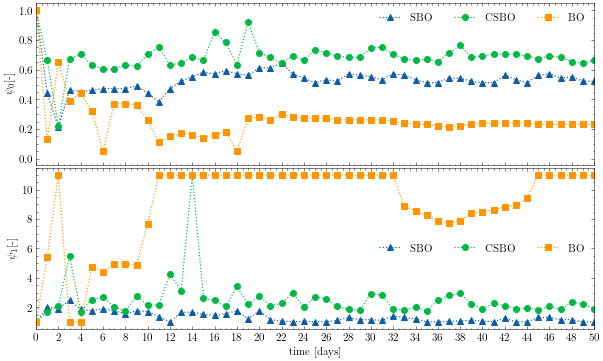

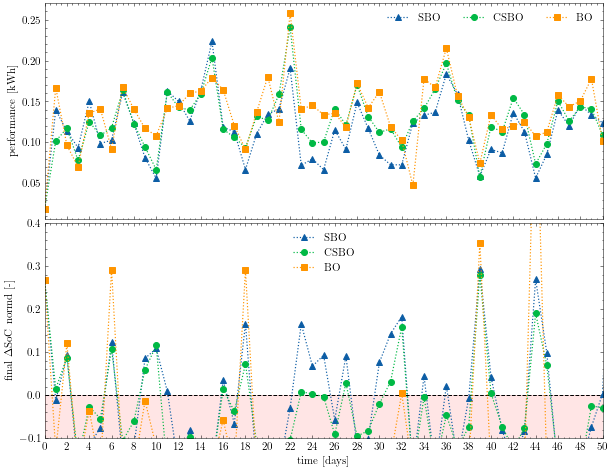

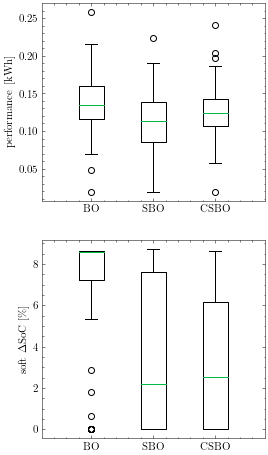

beta: 1 par_num 1


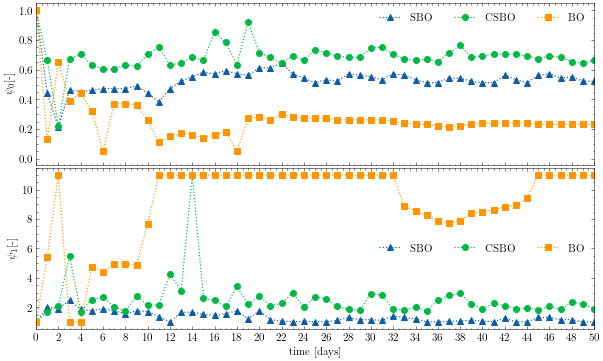

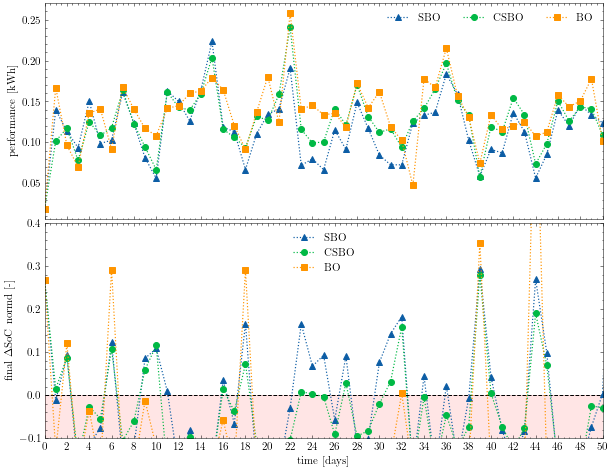

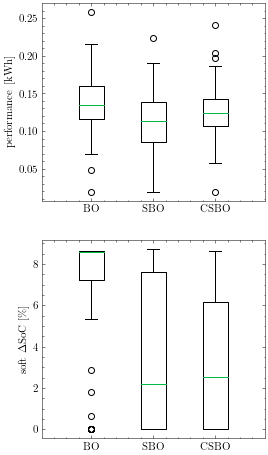

beta: 2 par_num 1


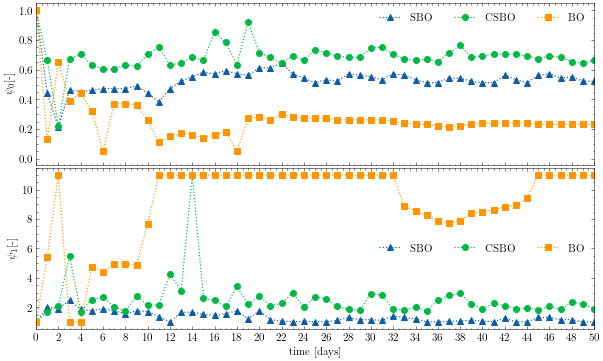

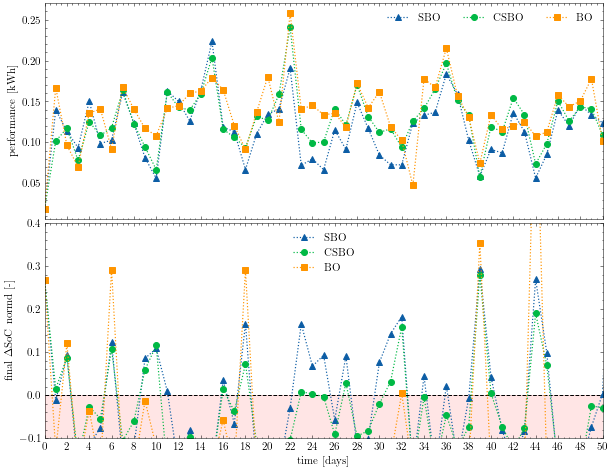

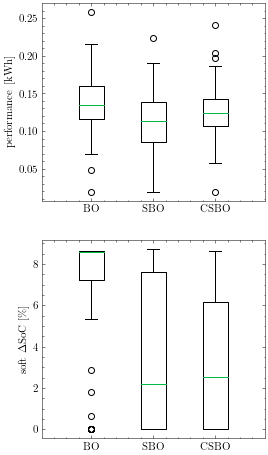

1.0
0.5
2.0
0.5
0.5
0.5
1.0
1.0
2.0
1.0
2.0
2.0
False
['2.0', '1.0', '2.0', '1.0', '2.0', '1.0', '0.5', '0.5', '1.0', '0.5', '0.5', '2.0']
[2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 0.5, 0.5, 1.0, 0.5, 0.5, 2.0]
False
beta: 0.5 par_num 2


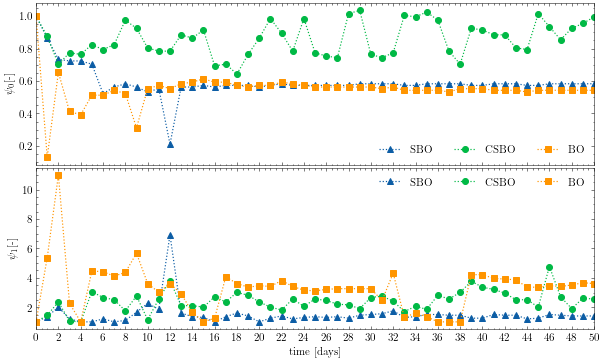

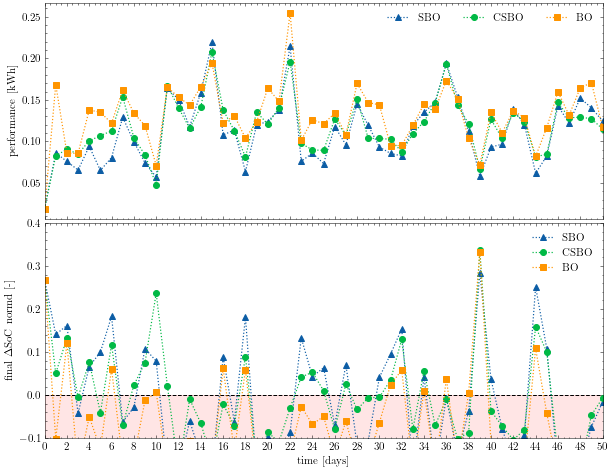

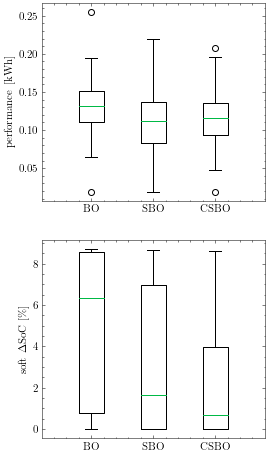

beta: 1 par_num 2


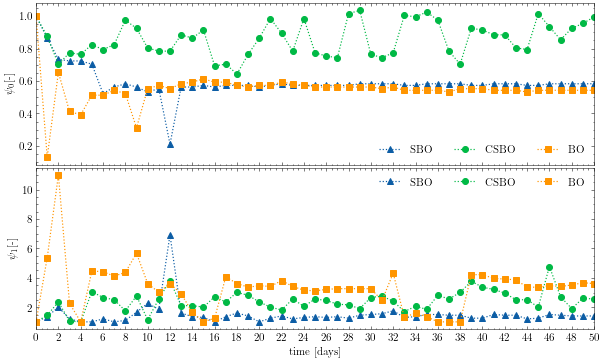

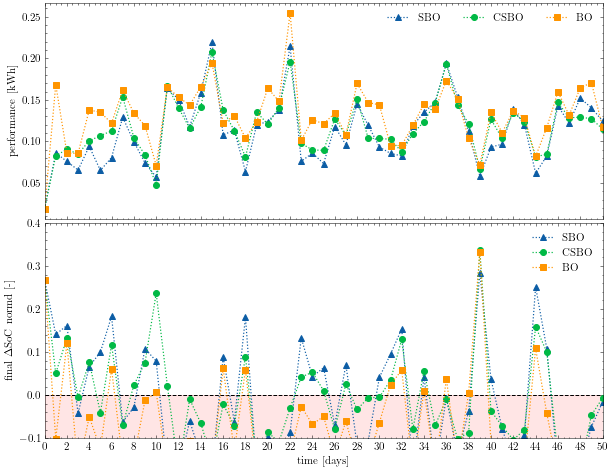

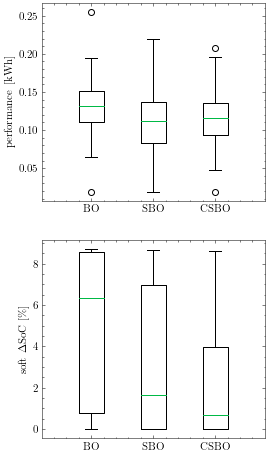

beta: 2 par_num 2


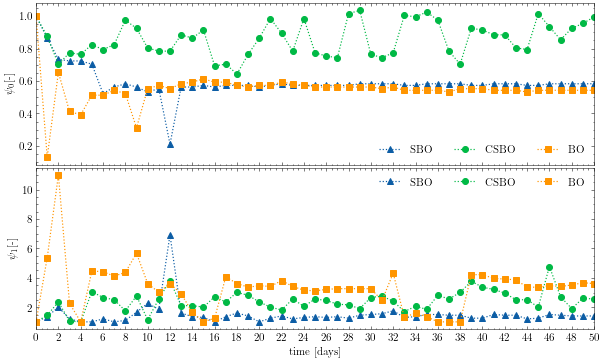

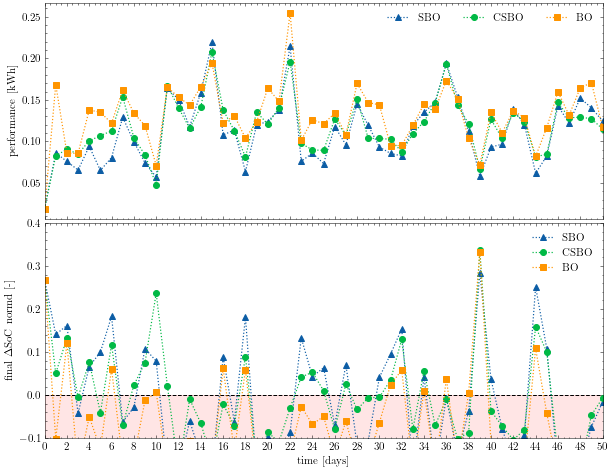

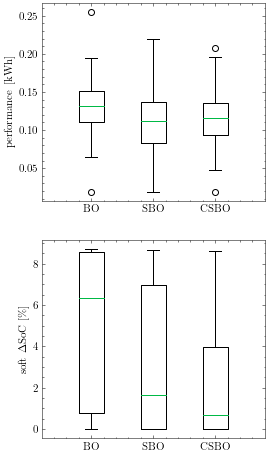

In [2]:
violations=[]
hp_list=[1,2]
tlim=50
height2=6
height=8
x0=[1,1]
# x0=[0,1]
# y0=[-0.  ,0.24909578]
y0=[0.01885535, 0.26756763]
for n in hp_list:
    import glob
    paths=sorted( glob.glob(f'sim_data_330_winter_gb_qs_32_9020/x_post_loglike{n}*'), key = os.path.getctime)
    file_paths=[os.path.normpath(path).split(os.sep)[1] for path in paths] #get file names
    betas=[file_path.split('_')[3].strip('b') for file_path in file_paths] # get betas
    for i, beta in enumerate(betas):
        print(beta)
        if beta.startswith('0.'):
            betas[i]=float(beta.replace('0.','.'))
        elif beta.startswith('0'):
            betas[i]=float(beta.replace('0','.'))  
        else:
            betas[i]=float(beta) # convert to float and add . to 05

    optypes=[file_path.split('_')[4] for file_path in file_paths] # get optypes 
    dates=[file_path[-19:-4] for file_path in file_paths] # get betas

    par=[]
    for i,path in enumerate(paths):
        foo=np.delete(get_data(path),violations,axis=0)
        foo[0,:]=x0
        par.append(foo)

    par_df=pd.DataFrame({'optype':optypes,'beta':betas,'par':par,'date':dates})
    par_df=par_df.set_index(['beta','optype']).sort_index()
    print(np.any(par_df.index.duplicated()))
    par_df=par_df[~par_df.index.duplicated()]
    paths=sorted( glob.glob(f'sim_data_330_winter_gb_qs_32_9020/y_post_loglike{n}*'), key = os.path.getctime)
    file_paths=[os.path.normpath(path).split(os.sep)[1] for path in paths] #get file names
    betas=[file_path.split('_')[3].strip('b') for file_path in file_paths] # get betas
    print(betas)
    for i, beta in enumerate(betas):
        if beta.startswith('0.'):
            betas[i]=float(beta.replace('0.','.'))
        elif beta.startswith('0'):
            betas[i]=float(beta.replace('0','.'))  
        else:
            betas[i]=float(beta) # convert to float and add . to 05

    optypes=[file_path.split('_')[4] for file_path in file_paths] # get optypes 
    dates=[file_path[-19:-4] for file_path in file_paths] # get betas
    print(betas)
    ct=10 #convergence time
    mae_=[]
    mae=[]
    cnst10=[]
    cts=[]
    cnst_hist=[]
    cnst_=[]
    sft_=[]
    cst_=[]
    for i,path in enumerate(paths):
        foo=np.delete(get_data(path),violations,axis=0)
        foo[0,:]=y0
        cst=foo
        cst_.append(cst)
#         err=-rnd_opt_cst.flatten()[ct:len(cst)]-cst[ct:,0]
#         mae_.append(np.abs(err))
#         mae.append(np.abs(err).sum()/(len(cst)-ct))   
#         cnst=get_data(path)[:,1]
        sft=get_data(path)[:,1]        
#         cnst_hist.append(np.histogram(cnst,bins=20,range=(-0.5,0)))
#         cnst10.append((cnst<-2e-2).astype(int).sum())
#         cnst[cnst>0]=0
#         cnst_.append(-cnst*50)
        sft[sft>0]=0
        sft_.append(-sft*50)        


    eval_df=pd.DataFrame({'optype':optypes,'beta':betas,'cst_':cst_,
#                           'mae':mae,'mae_':mae_,
                          'date':dates,'sft_':sft_})
    eval_df=eval_df.set_index(['beta','optype']).sort_index()
    print(np.any(eval_df.index.duplicated()))
    eval_df=eval_df[~eval_df.index.duplicated()]
    betas_list=[0.5,1,2]
    for beta in betas_list:
        print('beta:',beta,'par_num',n)
        model_label=['SBO','CSBO','BO']
        marker=['^','o','s']

        #Parameter plot
        with plt.style.context('science'):
            plt.rcParams.update({'font.size': 11})                        
            err=25e-2
            iterations=len(par_df.loc[(beta,'CSBO'),'par'][:,0])
            fig,ax=plt.subplots(2,sharex=True,figsize=(10,height2))
            for col,m in zip(model_label,marker):
                ax[0].plot(range(iterations),par_df.loc[(beta,col),'par'][:,0],f':{m}',label=col,linewidth=1.2)
                ax[1].plot(range(iterations),par_df.loc[(beta,col),'par'][:,1],f':{m}',label=col,linewidth=1.2)
#             ax[0].plot(range(iterations),rnd_opt_par[:iterations,0],':h',label='Optimal',linewidth=1.2,color='grey')
#             ax[1].plot(range(iterations),rnd_opt_par[:iterations,1],':h',label='Optimal',linewidth=1.2,color='grey')
            ax[0].set_xticks(np.arange(0,iterations,2))
#             ax[0].set_ylim([0,1])
#             ax[1].set_ylim([-1,0.25])
            ax[0].set_ylabel(r'$\psi_0$[-]')
            ax[0].legend(ncol=3)    
            ax[1].set_ylabel(r'$\psi_1$[-]')
            ax[1].legend(ncol=3)

            plt.xlabel('time [days]')
            plt.xlim([0,tlim])
            plt.subplots_adjust(hspace=0.02)
            plt.savefig(f'Qs9020/{n}_par_gb_qs_32_beta_{beta}_330.pdf')
            plt.show()
        # Performance and constraint plots    
        with plt.style.context('science'):
            err=25e-2
            plt.rcParams.update({'font.size': 11})            
            iterations=len(par_df.loc[(beta,'CSBO'),'par'][:,0])
            fig,ax=plt.subplots(2,sharex=True,figsize=(10,height))
            for col,m in zip(model_label,marker):
                ax[0].plot(range(iterations),eval_df.loc[(beta,col),'cst_'][:,0],f':{m}',label=col,linewidth=1.2)
                ax[1].plot(range(iterations),eval_df.loc[(beta,col),'cst_'][:,1],f':{m}',label=col,linewidth=1.2)
#                 ax[2].plot(range(iterations),eval_df.loc[(beta,col),'cst_'][:,2],':x',label=col,linewidth=1.2)
#             ax[0].plot(range(iterations),-rnd_opt_cst[:iterations,0],':h',label='Optimal',linewidth=1.2,color='grey')
            ax[1].hlines(0,0,iterations,'k',linestyles='--')
            ax[1].fill_between(range(iterations),y1=0,y2=-0.3,color='red',alpha=0.1)
#             ax[2].hlines(0,0,iterations,'k',linestyles='--')
#             ax[2].fill_between(range(iterations),y1=0,y2=-1,color='red',alpha=0.1)            
        #     ax[1].plot(range(iterations),rnd_opt_cst[:iterations,1],':h',label='Optimal',linewidth=1.2,color='grey')
            ax[0].set_xticks(np.arange(0,iterations,2))
            ax[0].set_ylabel(r'performance [kWh]')
            ax[0].legend(ncol=3)    
#             ax[0].set_ylim([-10,15])            
            ax[1].set_ylim([-0.1,0.4])
#             ax[2].set_ylim([-0.2,1.25])            
            ax[1].set_ylabel(r'final $\Delta$SoC normd [-]')
            ax[1].legend(ncol=1)
#             ax[2].set_ylabel(r'soft $\Delta$SoC normd [-]')
#             ax[2].legend(ncol=2)

            plt.xlabel('time [days]')
            plt.xlim([0,tlim])
            plt.subplots_adjust(hspace=0.02)
            plt.savefig(f'Qs9020/{n}_prf_gb_qs_32_beta_{beta}_330.pdf')
            plt.show()
        model_label=['BO','SBO', 'CSBO']
        model_names=[ 'BO','SBO', 'CSBO']
        # MAE and violation boxplots
        with plt.style.context('science'):
            plt.rcParams.update({'font.size': 11})            
            fig,ax=plt.subplots(2,1,figsize=(4,height))
            for i,col in enumerate(model_label): 
                ax[0].boxplot(eval_df.loc[(beta,col)].cst_[:,0],showfliers=True,labels=[model_names[i]],positions=[i/4],widths=0.1)
                ax[0].set_ylabel(r'performance [kWh]')
                ax[0].set_xlim([-0.2,0.7]) 
#                 ax[1].boxplot(eval_df.loc[(beta,col)].cnst_,showfliers=True,labels=[model_names[i]],positions=[i/4],widths=0.1)
#                 ax[1].set_ylabel(r'final $\Delta$SoC [\%]')
#                 ax[1].set_xlim([-0.2,0.7]) 
                ax[1].boxplot(eval_df.loc[(beta,col)].sft_,showfliers=True,labels=[model_names[i]],positions=[i/4],widths=0.1)
                ax[1].set_ylabel(r'soft $\Delta$SoC [\%]')     
                ax[1].set_xlim([-0.2,0.7]) 
#                 plt.ylim([-0.001,None])
    #             plt.yscale('log')
            #     plt.ylabel(r'$\textrm{R}^2$')
    #         plt.locator_params(axis="y", nbins=5) 
    #         plt.margins(tight=True)  
        #     plt.legend(['beta'])
            plt.savefig(f'Qs9020/{n}_boxplot_beta_{beta}_330.pdf')
            plt.show()

In [27]:
betas

[]

In [17]:
eval_df

cst_  \
beta optype                                                      
0.5  BO      [[0.01885535, 0.06002686, 0.26756763], [0.0615...   
     CSBO    [[0.01885535, 0.06002686, 0.26756763], [0.0452...   
     SBO     [[0.01885535, 0.06002686, 0.26756763], [0.0458...   
     SBOb    [[0.01885535, 0.06002686, 0.26756763], [0.0384...   
1.0  BO      [[0.01885535, 0.06002686, 0.26756763], [0.0546...   
     CSBO    [[0.01885535, 0.06002686, 0.26756763], [0.0302...   
     SBO     [[0.01885535, 0.06002686, 0.26756763], [0.0397...   
     SBOb    [[0.01885535, 0.06002686, 0.26756763], [0.0275...   
2.0  BO      [[0.01885535, 0.06002686, 0.26756763], [0.0596...   
     CSBO    [[0.01885535, 0.06002686, 0.26756763], [0.0121...   
     SBO     [[0.01885535, 0.06002686, 0.26756763], [0.0264...   
     SBOb    [[0.01885535, 0.06002686, 0.26756763], [0.0257...   

                                                           hst  \
beta optype                                                      
0.5  BO      ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
     CSBO    ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
     SBO     ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
     SBOb    ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
1.0  BO      ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
     CSBO    ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
     SBO     ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
     SBOb    ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
2.0  BO      ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
     CSBO    ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
     SBO     ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
     SBOb    ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   

                        date  cnst10  \
beta optype                            
0.5  BO      2022_03_25_0423      21   
     CSBO    2022_03_25_0423      12   
     SBO     2022_03_25_0423      11   
     SBOb    2022_03_25_0423       7   
1.0  BO      2022_03_25_0428      20   
     CSBO    2022_03_25_0428      11   
     SBO     2022_03_25_0428       8   
     SBOb    2022_03_25_0428       6   
2.0  BO      2022_03_25_0433      13   
     CSBO    2022_03_25_0433       6   
     SBO     2022_03_25_0433       7   
     SBOb    2022_03_25_0433       5   

                                                         cnst_  \
beta optype                                                      
0.5  BO      [-0.0, 1.5207233659118038, -0.0, -0.0, 0.56388...   
     CSBO    [0.2468961414383873, 0.31224442634787897, -0.0...   
     SBO     [-0.0, 0.30737570164952044, -0.0, -0.0, 1.3824...   
     SBOb    [-0.0, -0.0, -0.0, -0.0, 0.2258700021629513, -...   
1.0  BO      [0.5652794185072911, 0.6789671775299335, -0.0,...   
     CSBO    [-0.0, -0.0, -0.0, -0.0, 1.313067278398046, -0...   
     SBO     [-0.0, -0.0, -0.0, -0.0, 0.42007387566114496, ...   
     SBOb    [-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.7...   
2.0  BO      [-0.0, 0.9010328145211077, -0.0, -0.0, 1.44717...   
     CSBO    [-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.3...   
     SBO     [-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0825522...   
     SBOb    [-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0....   

                                                          sft_  
beta optype                                                     
0.5  BO      [0.8046727837245413, 1.5706120241183328, -0.0,...  
     CSBO    [0.16128146720322434, -0.0, -0.0, 0.7479115466...  
     SBO     [0.16128146720322434, -0.0, -0.0, 1.1726075619...  
     SBOb    [-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0....  
1.0  BO      [2.022549974968438, -0.0, -0.0, -0.0, -0.0, 1....  
     CSBO    [-0.0, -0.0, -0.0, 0.6526576273904361, 0.63837...  
     SBO     [-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0....  
     SBOb    [-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0....  
2.0  BO      [-0.0, -0.0, -0.0, -0.0, 1.3607053353925984, -...  
     CS

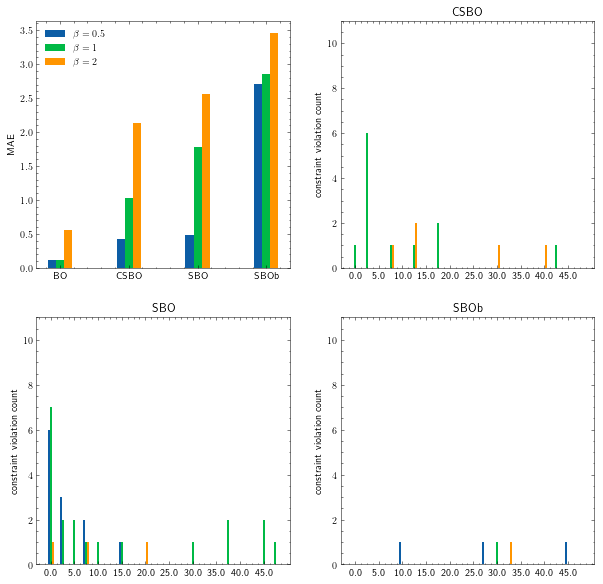

In [149]:
with plt.style.context('science'):
    x = np.arange(len(eval_df.index.levels[1]))  # the label locations
    width = 0.35  # the width of the bars

    fig, axes = plt.subplots(2,2,figsize=(10,10))
    rects1 = axes[0,0].bar(x - width/3, eval_df.loc[0.5].mae, width/3, label=r'$\beta=0.5$')
    rects2 = axes[0,0].bar(x , eval_df.loc[1].mae, width/3, label=r'$\beta=1$',tick_label=eval_df.index.levels[1])
    rects3 = axes[0,0].bar(x + width/3, eval_df.loc[2].mae, width/3, label=r'$\beta=2$')
    axes[0,0].set_ylabel('MAE')
    axes[0,0].legend()
    n_bins=20
    x = np.arange(len(eval_df.loc[(0.5,'CSBO')].hst[1][-n_bins:]))  # the label locations
    for i,ax in enumerate(axes.flatten()[1:]):
        width=0.5
        op=eval_df.index.levels[1][i+1]
        rects1 = ax.bar(x - width/3, eval_df.loc[(0.5,op)].hst[0][-n_bins:][::-1], width/3, label=r'$\beta=0.5$')
        rects2 = ax.bar(x , eval_df.loc[(1,op)].hst[0][-n_bins:][::-1], width/3, label=r'$\beta=1$',
                        tick_label=(np.abs(eval_df.loc[(0.5,'CSBO')].hst[1][-n_bins:])*100).round(1)[::-1])
        rects3 = ax.bar(x + width/3, eval_df.loc[(2,op)].hst[0][-n_bins:][::-1], width/3, label=r'$\beta=2$')
        ax.set_xticks(np.arange(0,n_bins,2))
        
        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax.set_ylabel('constraint violation count')
        ax.set_ylim([0,11])
        ax.set_title(op)
    # ax.bar_label(rects1, padding=3)
    # ax.bar_label(rects2, padding=3)
    # ax.bar_label(rects3, padding=3)

#     fig.tight_layout()
#     axes[1,1].set_xlim([10,30])
# plt.savefig('../fig_scripts/eval_mae_cnstviol_rp_qf55_loglike3_.png')
plt.show()

In [26]:
hp_list=[1,2,3,4]
tlim=50
height=8
height2=6

import glob
paths=glob.glob(f'sim_data_312_winter_rp0_qf_55_qs_32_model200C/x_post_*')
file_paths=[os.path.normpath(path).split(os.sep)[1] for path in paths] #get file names
betas=[file_path.split('_')[3].strip('b') for file_path in file_paths] # get betas
for i, beta in enumerate(betas):
    if beta.startswith('0.'):
        betas[i]=float(beta.replace('0.','.'))
    elif beta.startswith('0'):
        betas[i]=float(beta.replace('0','.'))       
    else:
        betas[i]=float(beta) # convert to float and add . to 05

optypes=[file_path.split('_')[4] for file_path in file_paths] # get optypes 
dates=[file_path[-19:-4] for file_path in file_paths] # get betas

par=[]
for i,path in enumerate(paths):
    par.append(get_data(path))



par_df=pd.DataFrame({'optype':optypes,'beta':betas,'par':par,'date':dates})
par_df=par_df.set_index(['beta','optype']).sort_index()
print(np.any(par_df.index.duplicated()))
# par_df=par_df[~par_df.index.duplicated()]

paths=glob.glob(f'sim_data_312_winter_rp0_qf_55_qs_32_model200C/y_post*')
file_paths=[os.path.normpath(path).split(os.sep)[1] for path in paths] #get file names
betas=[file_path.split('_')[3].strip('b') for file_path in file_paths] # get betas
hpar=[file_path.split('_')[2].strip('b') for file_path in file_paths] # get hp names
for i, beta in enumerate(betas):
    if beta.startswith('0.'):
        betas[i]=float(beta.replace('0.','.'))
    elif beta.startswith('0'):
        betas[i]=float(beta.replace('0','.'))        
    else:
        betas[i]=float(beta) # convert to float and add . to 05

optypes=[file_path.split('_')[4] for file_path in file_paths] # get optypes 
dates=[file_path[-19:-4] for file_path in file_paths] # get betas
ct=10 #convergence time
mae_=[]
mae=[]
cnst10=[]
cnstavg=[]
sftavg=[]
cts=[]
cnst_hist=[]
cnst_=[]
sft_=[]
cst_=[]
for i,path in enumerate(paths):
    cst=get_data(path)[:]
    cst_.append(cst)
    err=-rnd_opt_cst.flatten()[ct:len(cst)]-cst[ct:,0]
    mae_.append(np.abs(err))
    mae.append(np.abs(err).mean())
    cnst=get_data(path)[:,1]
    sft=get_data(path)[:,2]        
    cnst_hist.append(np.histogram(cnst,bins=20,range=(-0.5,0)))
    cnst10.append((cnst<-2e-2).astype(int).sum())
    cnst[cnst>0]=0
    cnst_.append(-cnst*50)
    cnstavg.append(cnst.mean()*50)
    sft[sft>0]=0
    sft_.append(-sft*50) 
    sftavg.append(sft.mean()*50)


eval_df=pd.DataFrame({'optype':optypes,'beta':betas,'mae':mae,'cnst':cnstavg,'sft':sftavg,'cst_':cst_,'mae_':mae_,'hst':cnst_hist,'date':dates,
                     'cnst10':cnst10,'cnst_':cnst_,'sft_':sft_,'hpar':hpar})
eval_df=eval_df.set_index(['beta','optype']).sort_index()
print(np.any(eval_df.index.duplicated()))
# eval_df=eval_df[~eval_df.index.duplicated()]


True
True


In [27]:
eval_df.sort_values('mae')

mae       cnst       sft  \
beta optype                                  
0.5  CSBO    1.187844  -4.479766 -0.310332   
     CSBO    1.243992  -2.634204 -0.722184   
     SBO     1.261081  -2.200790 -1.482173   
     BO      1.319510 -24.637897 -2.076554   
1.0  BO      1.320256 -24.638584 -2.076452   
2.0  BO      1.323436 -24.641997 -2.076931   
     BO      1.323436 -24.641997 -2.076931   
0.5  BO      1.327804 -24.645509 -2.076490   
     BO      1.327804 -24.645509 -2.076490   
2.0  BO      1.331076 -24.647013 -2.078681   
1.0  BO      1.332501 -24.647803 -2.077675   
     BO      1.332501 -24.647803 -2.077675   
0.5  CSBO    1.404208  -1.884069 -0.219797   
2.0  CSBO    1.564329  -1.595435 -0.162309   
0.5  CSBO    1.966138  -1.605317 -0.053429   
1.0  SBO     2.042461   0.000000 -1.720874   
0.5  SBO     2.047039  -4.211096 -0.510679   
1.0  CSBO    2.306433  -2.428499 -0.140789   
     CSBO    2.506170  -1.725999 -0.101180   
2.0  CSBO    2.533681  -1.335152 -0.465660   
0.5  SBO     2.551170  -4.106579 -0.389510   
     SBO     2.702930  -4.376550 -0.362096   
1.0  CSBO    2.744553  -1.577699 -0.200726   
     CSBO    2.835697  -0.824267 -0.560611   
2.0  SBO     3.168320  -1.548263 -0.042361   
     BO      3.255580 -18.361083 -1.880532   
1.0  SBO     3.305515  -4.145575 -0.295533   
0.5  BO      3.378031 -23.871566 -2.032731   
1.0  BO      3.426177 -23.615405 -2.072579   
2.0  SBO     4.237224   0.000000 -1.111212   
     CSBO    4.336890   0.000000 -1.046880   
     SBO     4.770820  -1.486206 -0.037639   
1.0  SBO     4.972254  -1.908676 -0.045560   
     SBO     4.998691  -1.990155 -0.045560   
2.0  SBO     5.194252  -1.720212 -0.062355   
     CSBO    5.712941  -0.006558  0.000000   
0.5  SBOb    7.987912  -2.810565 -0.559835   
     SBOb    8.065592  -2.421133 -0.755474   
     SBOb    8.089516  -1.735055 -0.715856   
1.0  SBOb    8.320870  -1.707040 -0.563846   
     SBOb    8.770029  -0.995600 -0.436600   
2.0  SBOb    9.029716  -0.906177 -0.242068   
     SBOb    9.046012  -0.650750 -0.278999   
1.0  SBOb    9.046513  -1.955076 -0.426908   
2.0  SBOb    9.144916  -0.621773 -0.145865   
     SBOb    9.258017  -0.818774 -0.222919   
1.0  SBOb    9.276140  -1.118336 -0.418289   
0.5  SBOb    9.297633  -1.845764 -0.331911   

                                                          cst_  \
beta optype                                                      
0.5  CSBO    [[-8.697836647857713, 0.49973139258949517, 0.9...   
     CSBO    [[-8.417458031695459, 0.4993756660582014, 0.95...   
     SBO     [[-8.417458031695459, 0.4993756660582014, 0.95...   
     BO      [[-3.779149180177212, 0.4990639417087141, -0.0...   
1.0  BO      [[-3.779149180177212, 0.4990639417087141, -0.0...   
2.0  BO      [[-3.779149180177212, 0.4990639417087141, -0.0...   
     BO      [[-3.779149180177212, 0.4990639417087141, -0.0...   
0.5  BO      [[-3.779149180177212, 0.4990639417087141, -0.0...   
     BO      [[-3.779149180177212, 0.4990639417087141, -0.0...   
2.0  BO      [[-3.779149180177212, 0.4990639417087141, -0.0...   
1.0  BO      [[-3.779149180177212, 0.4990639417087141, -0.0...   
     BO      [[-3.779149180177212, 0.4990639417087141, -0.0...   
0.5  CSBO    [[-8.455195701380338, 0.4991381471600587, 0.95...   
2.0  CSBO    [[-8.453028868751465, 0.499642243195012, 0.959...   
0.5  CSBO    [[-8.455195701380338, 0.4991381471600587, 0.95...   
1.0  SBO     [[-8.451185573886864, 0.49962443634582937, 0.9...   
0.5  SBO     [[-8.455195701380338, 0.4991381471600587, 0.95...   
1.0  CSBO    [[-8.48222837620977, 0.4989833670143068, 0.958...   
     CSBO    [[-8.454319043609923, 0.49925223652077905, 0.9...   
2.0  CSBO    [[-8.453516827543266, 0.49929857461974225, 0.9...   
0.5  SBO     [[-8.455195701380338, 0.4991381471600587, 0.95...   
     SBO     [[-8.697836647857713, 0.49973139258949517, 0.9...   
1.0  CSBO    [[-8.454319043609923, 0.49925223652077905, 0.9...   
     CSBO    [[-8.451185573886864, 0.49962443634582937, 0.9...   
2

In [ ]:
with plt.style.context('science'):
    x = np.arange(len(eval_df.index.levels[1]))  # the label locations
    width = 0.35  # the width of the bars

    fig, axes = plt.subplots(1,3,figsize=(15,5))
    rects1 = axes[0].bar(x - width/3, eval_df.loc[0.5].mae, width/3, label=r'$\beta=0.5$')
    rects2 = axes[0].bar(x , eval_df.loc[1].mae, width/3, label=r'$\beta=1$',tick_label=eval_df.index.levels[1])
    rects3 = axes[0].bar(x + width/3, eval_df.loc[2].mae, width/3, label=r'$\beta=2$')
    axes[0].set_ylabel('MAE')
    axes[0].legend()
    axes[0].set_xlabel('optimizer')

    n_bins=10
    x = np.arange(len(eval_df.loc[(0.5,'CSBO')].hst[1][-n_bins:]))  # the label locations
    for i,ax in enumerate(axes.flatten()[1:]):
        width=0.5
        op=eval_df.index.levels[1][i+1]
        rects1 = ax.bar(x - width/3, eval_df.loc[(0.5,op)].hst[0][-n_bins:][::-1], width/3, label=r'$\beta=0.5$')
        rects2 = ax.bar(x , eval_df.loc[(1,op)].hst[0][-n_bins:][::-1], width/3, label=r'$\beta=1$',
                        tick_label=(np.abs(eval_df.loc[(0.5,'CSBO')].hst[1][-n_bins:])*100).round().astype(int)[::-1])
        rects3 = ax.bar(x + width/3, eval_df.loc[(2,op)].hst[0][-n_bins:][::-1], width/3, label=r'$\beta=2$')
        ax.set_xticks(np.arange(0,n_bins,2))
        
        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax.set_ylabel('constraint violation count')
        ax.set_ylim([0,11])
        ax.set_title(op)
        ax.set_xlabel('bin [\%]')

    # ax.bar_label(rects1, padding=3)
    # ax.bar_label(rects2, padding=3)
    # ax.bar_label(rects3, padding=3)

#     fig.tight_layout()
#     axes[1,1].set_xlim([10,30])
# plt.savefig('../fig_scripts/eval_mae_cnstviol_rp_qf55_loglike3.png')
plt.show()

In [ ]:
with plt.style.context('science'):
    n_bins=20
    x = np.arange(len(eval_df.loc[(0.5,'CSBO')].hst[1][-n_bins:]))  # the label locations
    width = 0.35  # the width of the bars

    fig, axes = plt.subplots(3,figsize=(5,5))
    for i,ax in enumerate(axes.flatten()):
        op=eval_df.index.levels[1][i+1]
        rects1 = ax.bar(x - width/3, eval_df.loc[(0.5,op)].hst[0][-n_bins:], width/3, label=r'$\beta=0.5$')
        rects2 = ax.bar(x , eval_df.loc[(1,op)].hst[0][-n_bins:], width/3, label=r'$\beta=1$',
                        tick_label=(np.abs(eval_df.loc[(0.5,'CSBO')].hst[1][-n_bins:])*100).round(1))
        rects3 = ax.bar(x + width/3, eval_df.loc[(2,op)].hst[0][-n_bins:], width/3, label=r'$\beta=2$')

        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax.set_ylabel('count')
        ax.set_title(op)
        # ax.set_xticks(eval_df.index.levels[1].values)
        ax.legend()

    # ax.bar_label(rects1, padding=3)
    # ax.bar_label(rects2, padding=3)
    # ax.bar_label(rects3, padding=3)

    fig.tight_layout()

plt.show()

In [129]:
eval_df.index.levels[1]

Index(['BO', 'CSBO', 'SBO', 'SBOb'], dtype='object', name='optype')

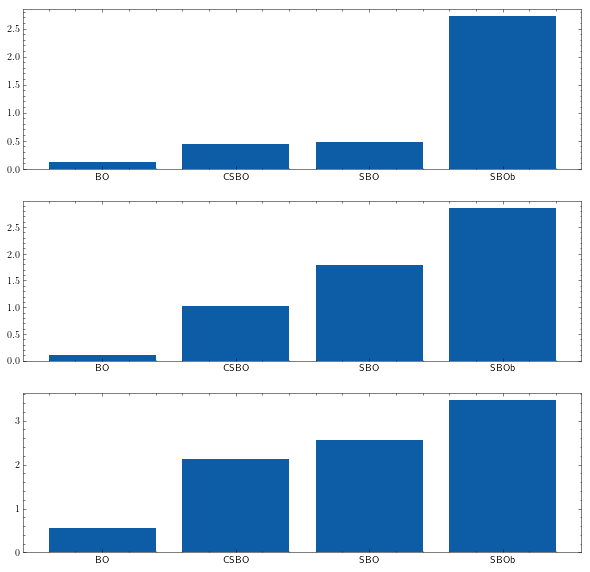

In [103]:
with plt.style.context('science'):
    fig,axes=plt.subplots(len(eval_df.index.levels[0]),figsize=(10,10))
    for i,ax in enumerate(axes.flatten()):
        df=eval_df.loc[eval_df.index.levels[0][i]]
        ax.bar(df.index,df.mae)

plt.show()

# GP evaluation

In [3]:
gps_b2=get_data('sim_data_312_winter_rp0_qf_55/CSBO_loglike3_b2__2022_03_08_0450')
gps_b05=get_data('sim_data_312_winter_rp0_qf_55/CSBO_loglike3_b05__2022_03_08_044')
bounds = [(0., 4.),(-1,1)]
parameter_set = safeopt.linearly_spaced_combinations(bounds, 100) 
optb2=safeopt.SafeOpt(gps_b2[1],parameter_set,fmin=0,num_contexts=1)
optb05=safeopt.SafeOpt(gps_b05[1],parameter_set,fmin=0,num_contexts=1)

This is local package in rbc-parameter-tuning
This is local package in rbc-parameter-tuning


3 3 1
context_fixed_inputs:  [(2, 0.0)]
3 3 1
context_fixed_inputs:  [(2, 1.0)]
3 3 1
context_fixed_inputs:  [(2, 0.0)]
3 3 1
context_fixed_inputs:  [(2, 1.0)]


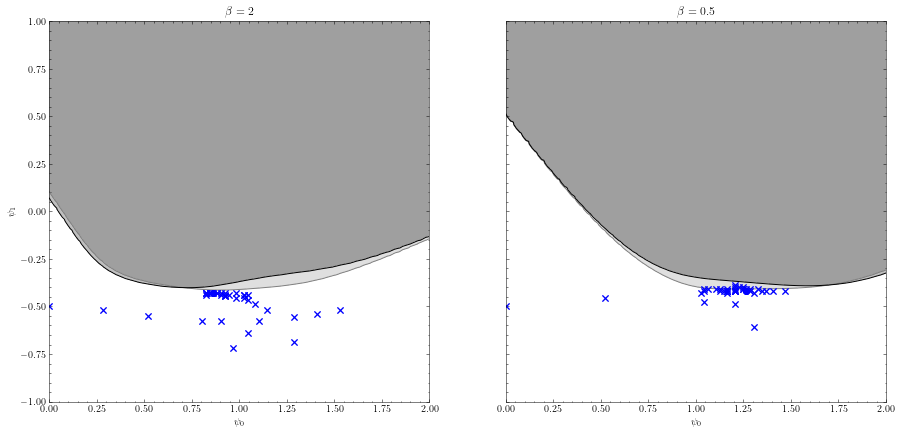

In [91]:
with plt.style.context('science'):
    fig,ax=plt.subplots(1,2,figsize=(15,7),sharey=True)
    optb2.context=[[0]]
    optb2.plot(100,levels=[-1,0,1],figure=fig,axis=ax[0], colors='grey',colorbar=False)
    optb2.context=[[1]]
    optb2.plot(100,levels=[-1,0,1],figure=fig,axis=ax[0],colors='black',colorbar=False)
    optb05.context=[[0]]
    optb05.plot(100,levels=[-1,0,1],figure=fig,axis=ax[1], colors='grey',colorbar=False)
    optb05.context=[[1]]
    optb05.plot(100,levels=[-1,0,1],figure=fig,axis=ax[1],colors='black',colorbar=False)
    ax[0].set_xlim([0,2])
    ax[1].set_xlim([0,2])
    ax[0].set_title(r'$\beta =2$')
    ax[1].set_title(r'$\beta =0.5$')
    ax[0].set_xlabel(r'$\psi_{0}$')
    ax[0].set_ylabel(r'$\psi_{1}$')    
    ax[1].set_xlabel(r'$\psi_{0}$')
    ax[1].set_title(r'$\beta =0.5$')
plt.savefig('../fig_scripts/qf_const_ctxt_loglike4.png')    
plt.show()

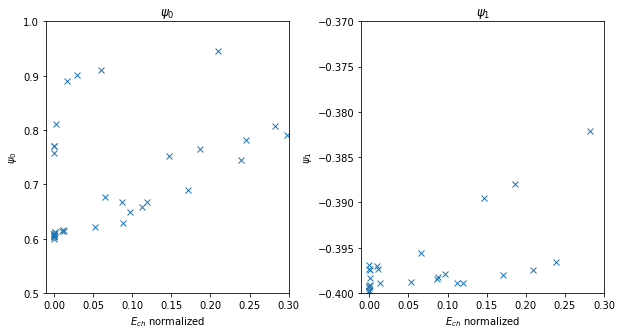

In [175]:
rnd_opt_cst=get_data('NL_opt/rnd_opt_cst_winter_3_1_2_2022_03_02_0252.npy')
rnd_opt_par=get_data('NL_opt/rnd_opt_par_winter_3_1_2_2022_03_02_0252.npy')
e_ch=get_data('sim_data_312_winter_rp0_qf_55/ech_winter_2022_03_08_0707.npy')
# rnd_opt_par=rnd_opt_par[~np.isnan(rnd_opt_par)]

fig,ax=plt.subplots(1,2,figsize=(10,5))
with plt.style.context('science'):
    ax[0].plot(e_ch[:len(rnd_opt_par)],rnd_opt_par[:,0],'x')
    ax[1].plot(e_ch[:len(rnd_opt_par)],rnd_opt_par[:,1],'x')
    ax[0].set_xlim([-0.01,0.3])
    ax[1].set_xlim([-0.01,0.3])
    ax[0].set_ylim([0.5,1])
    ax[1].set_ylim([-0.4,-0.37])
    ax[0].set_title(r'$\psi_0$')
    ax[0].set_xlabel(r'$E_{ch}$ normalized')
    ax[0].set_ylabel(r'$\psi_{0}$')    
    ax[1].set_xlabel(r'$E_{ch}$ normalized')
    ax[1].set_ylabel(r'$\psi_{1}$')
    ax[1].set_title(r'$\psi_1$')
plt.subplots_adjust(wspace=0.3)
plt.savefig('../fig_scripts/par_ech_corr_winter.png')

In [167]:
gps=get_data('sim_data_312_winter_rp0_qf_55/CSBO_loglike1_b05__2022_03_08_0421')
bounds = [(0., 4.),(-1,1)]
parameter_set = safeopt.linearly_spaced_combinations(bounds, 100) 
opt=safeopt.SafeOpt(gps,parameter_set,fmin=[-np.inf,0],num_contexts=1)


This is local package in rbc-parameter-tuning
